---

## 📂 About the Dataset  

The dataset consists of **2,240 records** and **29 attributes**, which can be categorized into the following groups:  

### 👤 Customer Information  
- `ID`, `Year_Birth`, `Education`, `Marital_Status`, `Income`, `Kidhome`, `Teenhome`, `Dt_Customer`, `Recency`  

### 🛒 Products (Amount spent in the last 2 years)  
- `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`  

### 🎯 Promotion  
- `NumDealsPurchases`: Number of purchases made with a discount  
- `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Response`  

### 🏬 Place (Purchasing Channels)  
- `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`  

---


#**Loading and exploring the data**

##**importing the libraries**

In [ ]:

# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. To preprocess the data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
# 5. Metrics



##**reading and uploding the dataset**


In [ ]:
df=pd.read_csv('marketing_campaign.csv',sep="\t")

##**Dataset Information**

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df['Income'].fillna(df['Income'].median(), inplace=True)


/tmp/ipython-input-2154417476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


 **Handling Missing Values**\
During EDA, we found **24 missing values** in the `Income` column.  
Since this represents less than 1.1% of the total dataset, two approaches can be considered:  
- Dropping the records with missing values  
- Replacing them with a statistical measure (e.g., median income)  

For this analysis, we choose to **impute with median** to keep the dataset consistent.  



**Data Preprocessing Notes**

- **Date Parsing:**  
  The feature `Dt_Customer`, which indicates the date a customer joined the database, is not yet parsed as a `datetime` object.  
  We will convert it to a proper `datetime` format and may extract additional features such as `year`, `month`, or `customer tenure`.  

- **Categorical Features:**  
  Several features are categorical (`dtype: object`), such as `Education` and `Marital_Status`.  
  These need to be encoded into numeric form before applying machine learning algorithms.  

---


In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
print("Oldest customer date:", df['Dt_Customer'].min())
print("Oldest customer date:", df['Dt_Customer'].max())

Oldest customer date: 2012-07-30 00:00:00
Oldest customer date: 2014-06-29 00:00:00


- Now we will be exploring the unique values in the categorical features to get a clear idea of the data.

In [ ]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Unique categories present in the Education: Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64




<Figure size 800x800 with 0 Axes>

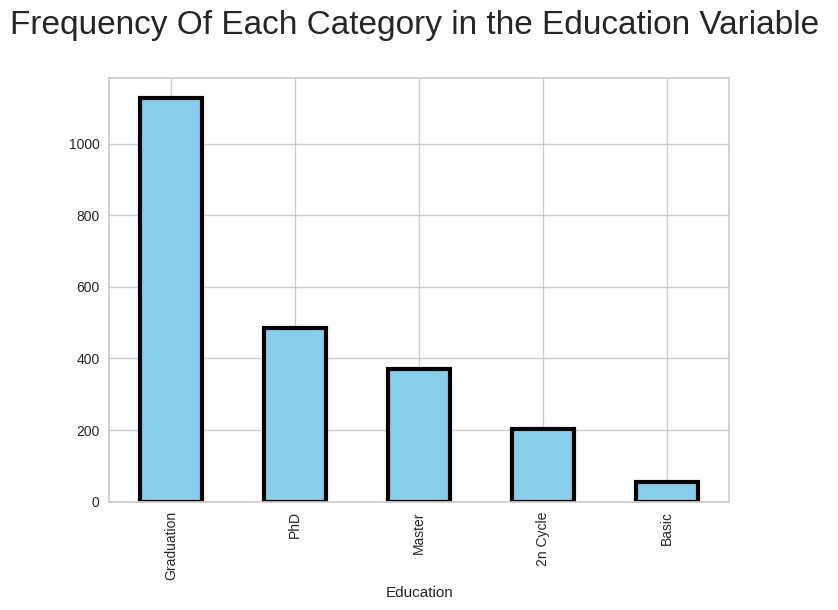

<Figure size 800x800 with 0 Axes>

In [ ]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Education"
print("Unique categories present in the Education:",df["Education"].value_counts())
print('\n')

#VISUALIZING THE "Education"
df['Education'].value_counts().plot(kind='bar',color='skyblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

- 97.58% of Customers in the dataset are "Post Graduate".
- 2.410% of Customers in the dataset are "Under Graduate".

In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

Unique categories present in the Marital_Status: Marital_Status
Relationship    1444
Single           796
Name: count, dtype: int64




<Figure size 800x800 with 0 Axes>

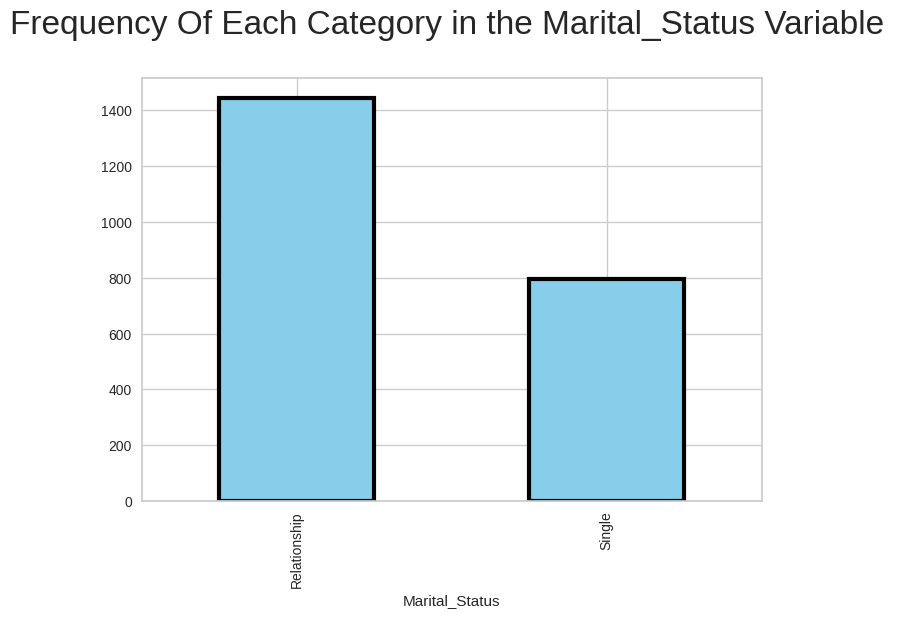

<Figure size 800x800 with 0 Axes>

In [ ]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Marital_Status"
print("Unique categories present in the Marital_Status:",df['Marital_Status'].value_counts())
print("\n")


#VISUALIZING THE "Marital_Status"
df['Marital_Status'].value_counts().plot(kind='bar',color='skyblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Marital_Status Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

- 64.46% of Customers in the dataset are in "Relationship".
- 35.53% of Customers in the dataset are "Single".

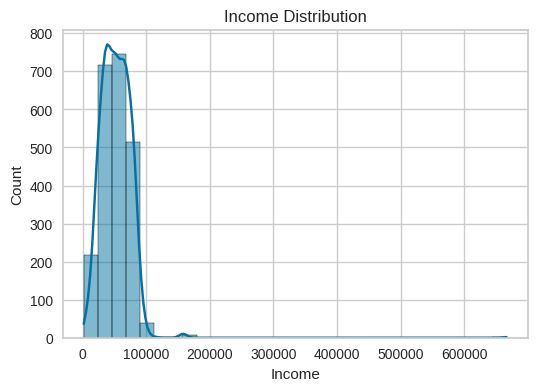

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.show()

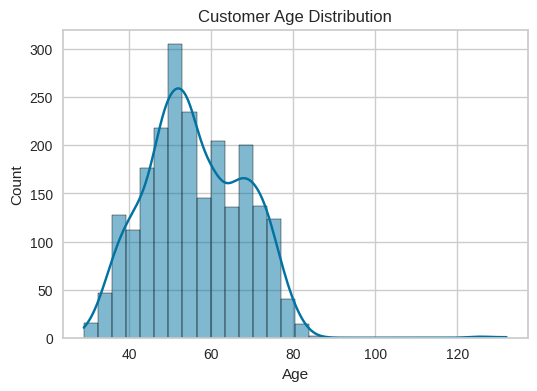

In [ ]:
df['Age'] = 2025 - df['Year_Birth']
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Customer Age Distribution")
plt.show()

Unique categories present in the Age: Age
12    1189
11     557
13     494
Name: count, dtype: int64




<Figure size 800x800 with 0 Axes>

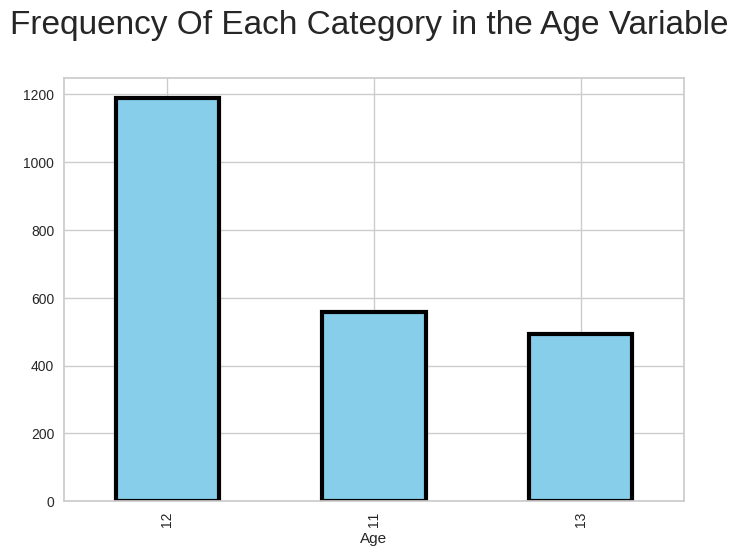

<Figure size 800x800 with 0 Axes>

In [ ]:
#number of days a customer was engaged with company
#changing "Dt_customer" into timestamp format

df['Dt_Customer']=pd.to_datetime(df.Dt_Customer, dayfirst=True)
#adding a column "Age" in dataframe
df['Age'] = (pd.Timestamp('now').year) - (pd.to_datetime(df['Dt_Customer']).dt.year)
print("Unique categories present in the Age:",df['Age'].value_counts())
print("\n")

#visualizing the "Age"
df['Age'].value_counts().plot(kind='bar',color='skyblue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Age Variable \n",fontsize=24)
plt.figure(figsize=(8,8))


#**Data Preprocessing**

In [ ]:
#Label encoding the categorical features
#Get list of categorical variables
cat_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("All features are now numerical")

All features are now numerical


In [ ]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
non_numeric = ds.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns before conversion:", non_numeric)

Non-numeric columns before conversion: []


In [ ]:
if 'Dt_Customer' in ds.columns:
    ds['Dt_Customer'] = pd.to_datetime(ds['Dt_Customer'], dayfirst=True, errors='coerce')

In [ ]:
scaled_ds.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,-0.020999,-0.985345,-0.350141,0.251004,0.235696,-0.825218,-0.929894,-1.303763,0.307039,0.983781,...,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0.0,0.0
1,-1.053058,-1.235733,-0.350141,0.251004,-0.235454,1.032559,0.906934,-0.898762,-0.383664,-0.870479,...,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0.0,0.0
2,-0.447070,-0.317643,-0.350141,1.180340,0.773999,-0.825218,-0.929894,0.610786,-0.798086,0.362723,...,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.0,0.0
3,0.181716,1.268149,-0.350141,1.180340,-1.022355,1.032559,-0.929894,-0.677853,-0.798086,-0.870479,...,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0.0,0.0
4,-0.082614,1.017761,1.428354,-0.678332,0.241888,1.032559,-0.929894,0.326760,1.550305,-0.389085,...,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0.0,0.0


#**Clustering**

---

## 🔹 Clustering Approach

In this section, we will apply clustering techniques to segment customers based on their features.  
A detailed theoretical explanation of **clustering methods (such as KMeans and others)** has already been provided in the accompanying documentation.  



**Why DBSCAN Was Not Used**

Although DBSCAN is a popular density-based clustering algorithm, it was not suitable for this dataset due to the following reasons:

1. **Irregular and complex cluster shapes** – While DBSCAN handles arbitrary shapes in some cases, our clusters vary widely in density and shape, which can lead to unstable results.  
2. **High noise and outliers** – The dataset contains many outliers, which DBSCAN may classify as noise, reducing cluster interpretability.  
3. **Unknown number of clusters** – DBSCAN requires careful tuning of `eps` and `min_samples`; with unknown cluster count, this becomes challenging.

> Considering these characteristics, KMeans was chosen as it provides more stable and interpretable clusters for this analysis.


 **Choosing the Number of Clusters (Elbow Method)**
   - We use the **Elbow Method** by plotting Within-Cluster-Sum-of-Squares (WCSS) for different k values (1–17).
   - The "elbow point" suggests the optimal number of clusters.
   - In our case, the elbow suggests **k = 4**.

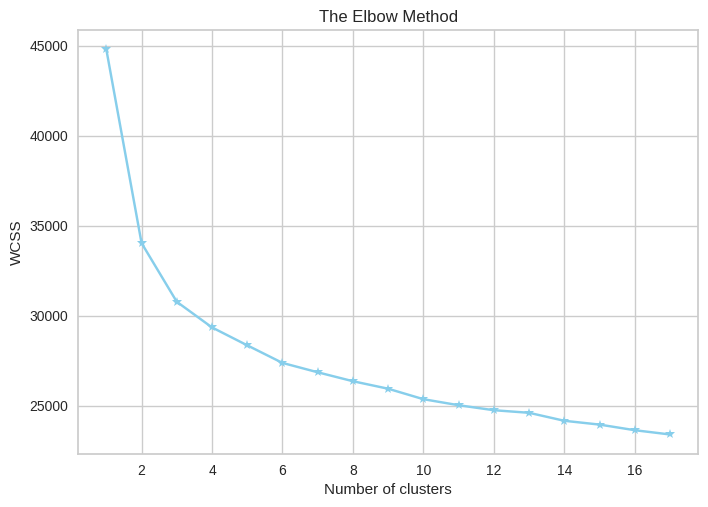

In [ ]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(scaled_ds)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = 'skyblue',marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**KMeans Clustering**
   - Apply **KMeans** with the selected k (4).
   - Each customer is assigned to a cluster (`y_kmeans`).
   - The cluster labels are added back to the dataset for further profiling.

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(scaled_ds)

In [ ]:
scaled_ds['Cluster'] = y_kmeans


 **Dimensionality Reduction with PCA**
   - Our dataset has ~30 features, which makes visualization difficult.
   - We use **PCA (Principal Component Analysis)** to reduce dimensions to **2 principal components** for visualization.
   - Note: PCA is **not used for clustering itself** here (clustering is on full data), only for visualization.
   - Explained variance ratio shows how much information PC1 and PC2 preserve.

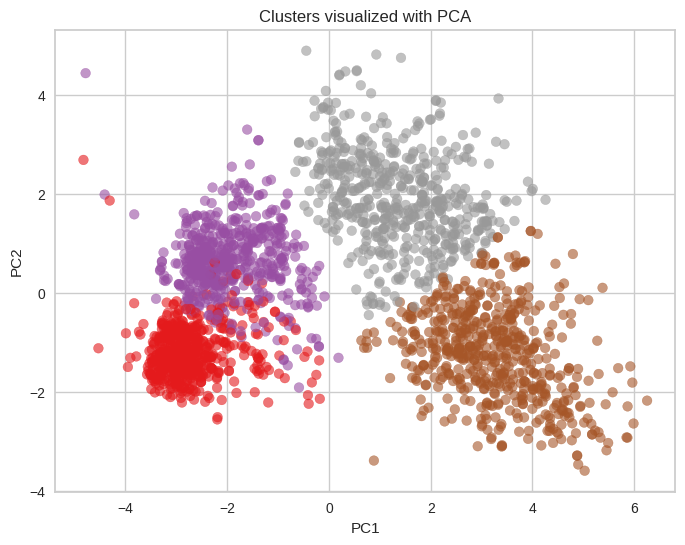

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce features to 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_ds)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=y_kmeans, cmap="Set1", alpha=0.6)
plt.title("Clusters visualized with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


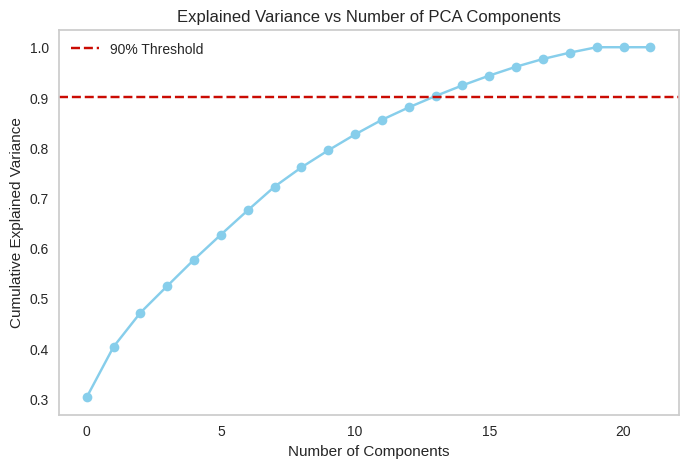


Cluster Profiles (mean of features per cluster):

               ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
Cluster                                                                        
0        0.002302    0.793661  -0.310347       -0.041713 -0.893832  0.767162   
1       -0.004078   -0.475415   0.134152        0.033353 -0.378004  0.455888   
2       -0.003543   -0.018797  -0.054239        0.067391  0.973666 -0.741505   
3        0.005333   -0.357533   0.256313       -0.059914  0.295731 -0.483715   

         Teenhome  Dt_Customer   Recency  MntWines  ...  MntFishProducts  \
Cluster                                             ...                    
0       -0.888795     0.029787 -0.020064 -0.799995  ...        -0.509331   
1        0.848893     0.051776  0.052904 -0.691307  ...        -0.577110   
2       -0.630654    -0.050903  0.014598  0.832231  ...         1.157928   
3        0.778626    -0.029028 -0.046375  0.655373  ...        -0.113452   

         Mn

In [ ]:
# 1. Cumulative Variance Plot
pca_full = PCA().fit(scaled_ds.drop('Cluster', axis=1))

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', color='skyblue')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of PCA Components")
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Threshold")
plt.legend()
plt.grid()
plt.show()

# 2. Cluster Profiling (mean of features per cluster)
cluster_profiles = scaled_ds.groupby("Cluster").mean()
print("\nCluster Profiles (mean of features per cluster):\n")
print(cluster_profiles)

# 3. Feature Loadings (feature importance of pc1 and pc2)
pca_2d = PCA(n_components=2).fit(scaled_ds.drop('Cluster', axis=1))
loadings = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=scaled_ds.drop('Cluster', axis=1).columns
)

print("\nTop 10 features contributing to PC1:\n", loadings['PC1'].abs().sort_values(ascending=False).head(10))
print("\nTop 10 features contributing to PC2:\n", loadings['PC2'].abs().sort_values(ascending=False).head(10))


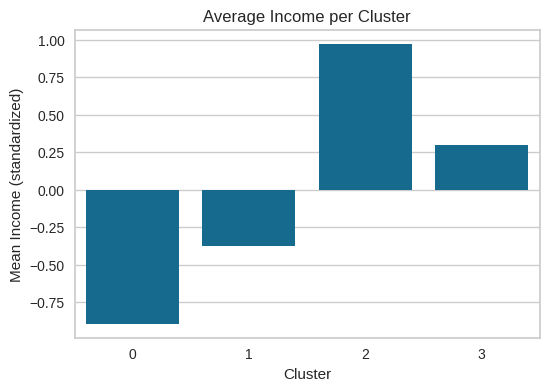

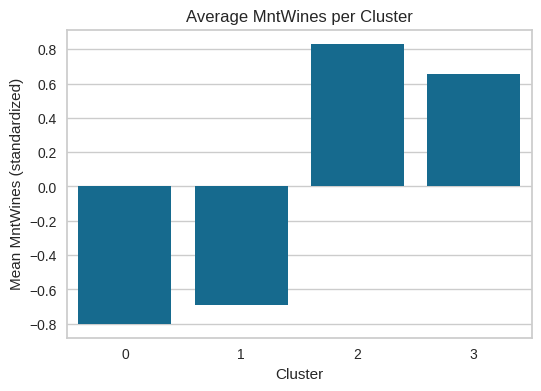

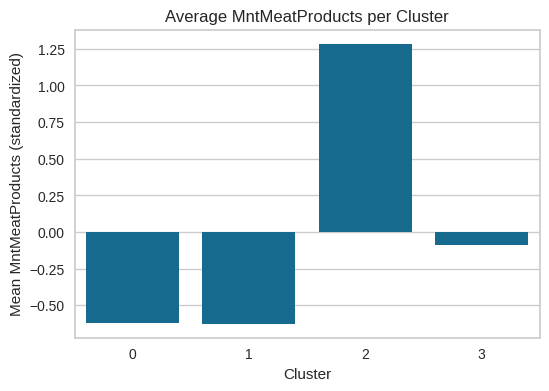

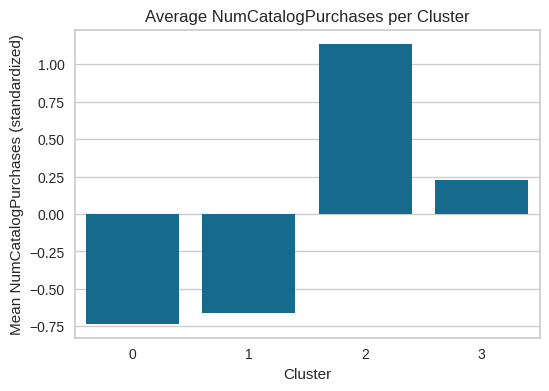

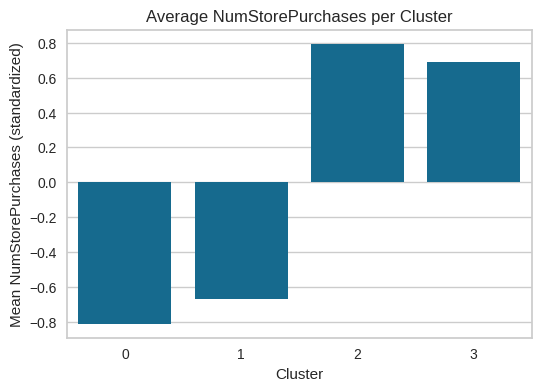

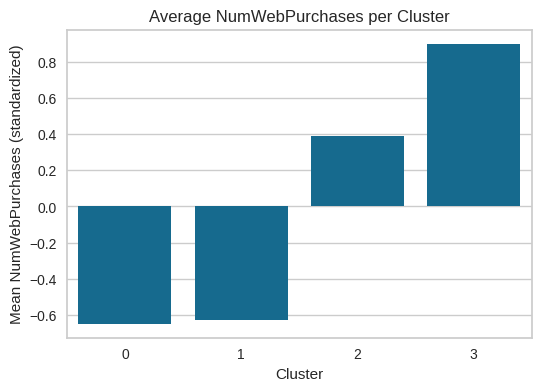

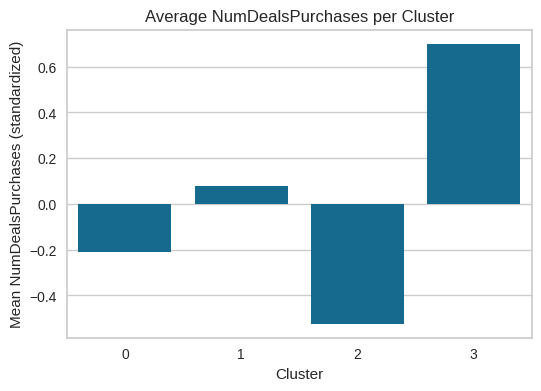

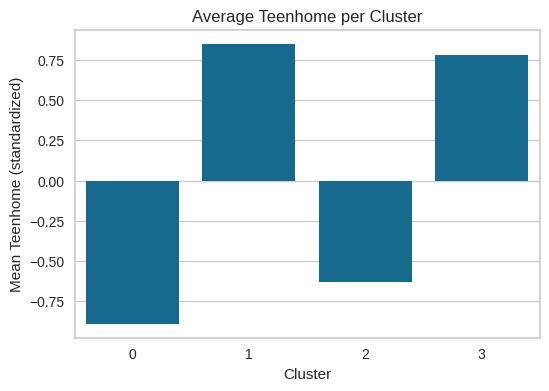

In [ ]:
features_to_plot = [
    "Income",
    "MntWines",
    "MntMeatProducts",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebPurchases",
    "NumDealsPurchases",
    "Teenhome"
]
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature])
    plt.title(f"Average {feature} per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(f"Mean {feature} (standardized)")
    plt.show()

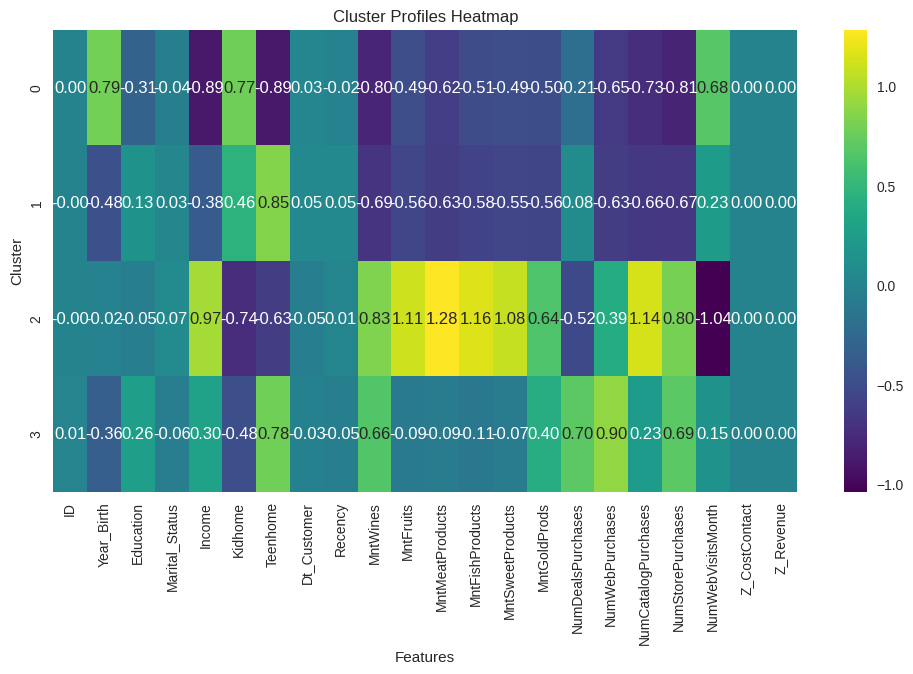

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(cluster_profiles, cmap="viridis", annot=True, fmt=".2f")
plt.title("Cluster Profiles Heatmap")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()


# Cluster Profiling – Conclusions

After analyzing the mean values of features for each cluster, we can summarize the customer groups as follows:

| Cluster | Profile Summary |
|---------|-----------------|
| **0** | **Low-income families with children** → High `Kidhome`/`Teenhome`, low income, low spending on wines & meat products. Likely budget-conscious households. |
| **1** | **Medium-low income families with teens** → Slightly below-average income, higher `Teenhome`, low product spending overall. Price-sensitive segment. |
| **2** | **High-income luxury buyers** → Very high income, heavy spenders on wines, gold, and catalog purchases. Few children at home. Prime target for premium campaigns. |
| **3** | **Medium-high income, multi-channel shoppers** → Active in web and store purchases, moderate-to-high income, reasonable spending on wines and gold. Represent a digitally engaged customer base. |

---

##  Key Insights
- **Cluster 2** represents the most valuable customers with high purchasing power → best suited for **premium product marketing**.  
- **Clusters 0 and 1** are more **price-sensitive** and family-oriented → promotions and discounts may work better.  
- **Cluster 3** shows a good balance of spending and online/offline engagement → potential for **cross-channel marketing strategies**.


>  **Note:** The features shown in the plots and used for cluster interpretation were selected **only for explaining and visualizing cluster differences**. The clustering algorithm (KMeans) was run on **all features**. This feature selection is **not part of the modeling process** and is purely for **cluster profiling**.
